Assumptions:

Data was entered accurately

    I cant check and change every cell on a large data set, so I won't do that here for the genres category
    
    However I will browse through the aritsts to see if I like how they have been entered
   
       IF an artist is not how I would like it to be, I will change it
       
       ELSE the artist name will not change


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
%matplotlib inline

def t_sec(x):
    x=str(x)
    m=x[0]
    s=x[1:3]
    m=int(m)
    s=int(s)
    t=m*60+s
    return t

df=pd.read_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-02/assets/billboard.csv")
name=range(1,77)
names=["week_"+str(x) for x in name]

#Renaming columns; made easier by using range function and concatenation
df.columns=['year','artist','track_name','track_time','genre','date_entered','date_peaked','week_1', 'week_2', \
            'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12',\
            'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', \
            'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', \
            'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', \
            'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', \
            'week_49', 'week_50', 'week_51', 'week_52', 'week_53', 'week_54', 'week_55', 'week_56', 'week_57', \
            'week_58', 'week_59', 'week_60', 'week_61', 'week_62', 'week_63', 'week_64', 'week_65', 'week_66', \
            'week_67', 'week_68', 'week_69', 'week_70', 'week_71', 'week_72', 'week_73', 'week_74', 'week_75', \
            'week_76']

#Change time to seconds
df["track_time"]=df["track_time"].apply(lambda x: t_sec(int(x[0:7].replace(',',''))))

#Change Genre Names
df['genre'].replace('R & B','R&B', inplace=True)
df['genre'].replace("Rock'n'roll","Rock",inplace=True)

#Datetime
df['date_entered']=pd.to_datetime(df['date_entered'])
df['date_peaked']=pd.to_datetime(df['date_peaked'])

#Artist Names
df["artist"].replace("Janet","Janet Jackson",inplace=True)
df["artist"].replace("2Ge+her","2Gether",inplace=True)
df["artist"].replace("matchbox twenty","Matchbox Twenty",inplace=True)

#Take * and replace with NaN
df.replace('*',np.nan,inplace=True)
#New column for days between date_entered and date_peaked
df["days_until_peak"]= [int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j")) if  \
       int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j"))>=0 else \
       int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j"))+365 \
                    for x,y in zip(df['date_peaked']\
                                   , df['date_entered'])]
#look up how to convert date to how many days have past in year
#might have to set date to %m-%d and create dictionary with month values and compute manually from there

#Rearranging columns and finding lowest rank acheived
cols=df.columns.tolist()
cols.insert(7,cols[-1:][0])
cols=cols[:-1]
df=df[cols]

cols=df.columns.tolist()
cols=cols[8:]

low_list=[]
i=0

while i<317:
    low=[]
    for col in cols:
        low.append(df.loc[i,col])
    low_list.append(low)
    i+=1

i=0
j=0

while j<len(low_list):
    i=0
    while i<len(low_list[j]):
        if type(low_list[j][i])==str:
            low_list[j][i]=int(low_list[j][i])
        i+=1
    j+=1
#Finds lowest rank achieved
lowest_rank = [min (x) for x in low_list]
#Counts number of time lowest rank occurs
lowest_rank_count = [x.count(y) for x,y in zip(low_list,lowest_rank)]
#Counts total weeks in rankings
total_weeks=[]
for x in low_list:
    i=0
    for y in x:
        if np.isnan(y):
            pass
        else:
            i+=1

    total_weeks.append(i)

#Put new lists in to df
temp_df1=pd.DataFrame(lowest_rank,columns=['lowest_rank'])
temp_df2=pd.DataFrame(lowest_rank_count,columns=['lowest_rank_count'])
temp_df3=pd.DataFrame(total_weeks,columns=['total_weeks'])
df=pd.concat([df,temp_df1,temp_df2,temp_df3],axis=1)
cols=df.columns.tolist()
cols.insert(8,cols[-3:][0])
cols.insert(9,cols[-2:][0])
cols.insert(10,cols[-1:][0])
cols=cols[:-3]
df=df[cols]

In [57]:
#Weeks in chart ; lowest rank ; weeks at lowest rank ; 
i=1
array=np.ones([1,2])
#print array
while i<len(df['year']):
    x=df.iloc[i,7:-1].value_counts().reset_index()
    x['index']=x['index'].astype(np.int)
    x=x.sort_values('index')
    x=np.array(x.iloc[[0]])[0]
    x = x.reshape((1,2))
    array = np.hstack([x,array])
    i+=1
array=array.reshape((317,2))
array=array[0:317] #Get rid of original ones array
dfarray=pd.DataFrame(array,columns=["Lowest_Rank","Weeks_at_Lowest"])
dfarray[::-1]


,Lowest_Rank,Weeks_at_Lowest
316,1.0,1.0
315,1.0,10.0
314,1.0,4.0
313,1.0,4.0
312,1.0,4.0
311,1.0,3.0
310,1.0,3.0
309,1.0,3.0
308,1.0,2.0
307,1.0,2.0


In [147]:
print df.columns
x='pink'
c_dic1={'Rock':'yellow','Country':'purple','Rap':'purple','R&B':'purple','Pop':x,'Latin':x,\
       'Electronica':x,'Gospel':x,'Jazz':x,'Reggae':x}
c_dic2={'Rock':'pink','Country':'pink','Rap':'purple','R&B':'pink','Pop':'pink','Latin':x,\
       'Electronica':x,'Gospel':x,'Jazz':x,'Reggae':x}
colors1=[c_dic1[x] for x in df['genre']]
colors2=[c_dic2[x] for x in df['genre']]

Index([u'year', u'artist', u'track_name', u'track_time', u'genre',
       u'date_entered', u'date_peaked', u'days_until_peak', u'lowest_rank',
       u'lowest_rank_count', u'total_weeks', u'week_1', u'week_2', u'week_3',
       u'week_4', u'week_5', u'week_6', u'week_7', u'week_8', u'week_9',
       u'week_10', u'week_11', u'week_12', u'week_13', u'week_14', u'week_15',
       u'week_16', u'week_17', u'week_18', u'week_19', u'week_20', u'week_21',
       u'week_22', u'week_23', u'week_24', u'week_25', u'week_26', u'week_27',
       u'week_28', u'week_29', u'week_30', u'week_31', u'week_32', u'week_33',
       u'week_34', u'week_35', u'week_36', u'week_37', u'week_38', u'week_39',
       u'week_40', u'week_41', u'week_42', u'week_43', u'week_44', u'week_45',
       u'week_46', u'week_47', u'week_48', u'week_49', u'week_50', u'week_51',
       u'week_52', u'week_53', u'week_54', u'week_55', u'week_56', u'week_57',
       u'week_58', u'week_59', u'week_60', u'week_61', u'week_62', u'week_

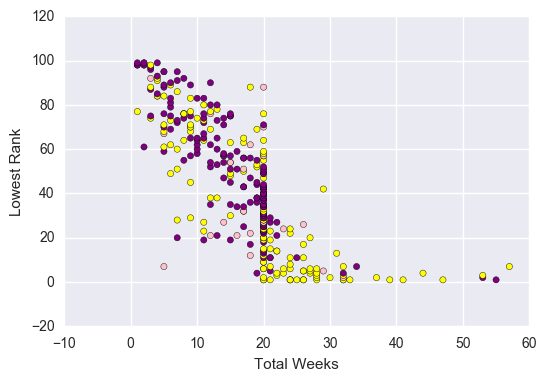

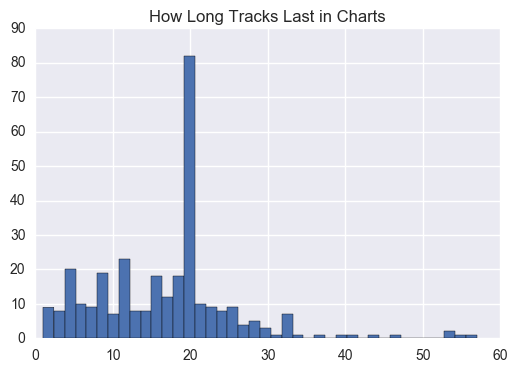

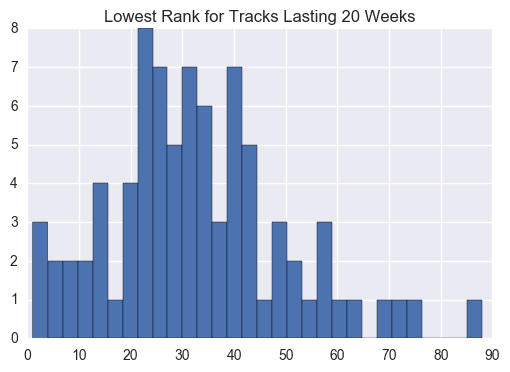

In [177]:
#sns.countplot(df["lowest_rank_count"],color='b')
#sns.jointplot("days_until_peak","total_weeks",data=df)
#sns.jointplot("lowest_rank","total_weeks",data=df,color='genre')
plt.scatter(df["total_weeks"],df["lowest_rank"],c=colors1)
plt.xlabel("Total Weeks")
plt.ylabel("Lowest Rank")
plt.show()
plt.hist(df["total_weeks"],bins=40)
plt.title("How Long Tracks Last in Charts")
plt.show()
plt.hist(df[df["total_weeks"]==20]["lowest_rank"],bins=30)
plt.title("Lowest Rank for Tracks Lasting 20 Weeks")
plt.show()

In [34]:
df[df["total_weeks"]==20].T.iloc[0:40]

,7,16,22,43,44,51,52,54,59,61,...,193,199,200,205,208,221,238,244,263,288
year,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
artist,"Iglesias, Enrique","Carey, Mariah",98�,Eiffel 65,"Badu, Erkyah","Spears, Britney","Backstreet Boys, The",Ja Rule,Filter,Mystikal,...,3 Doors Down,Papa Roach,"Adams, Yolanda","Henley, Don",Sister Hazel,"Price, Kelly","Anthony, Marc","Rimes, LeAnn",Metallica,Madison Avenue
track_name,Be With You,Thank God I Found You,Give Me Just One Night (Una Noche),Blue (Da Ba Dee),Bag Lady,Oops!.. I Did It Again,Shape Of My Heart,Between Me And You,Take A Picture,Shake Ya Ass,...,Loser,Last Resort,Open My Heart,Taking You Home,Change Your Mind,You Should've Told Me,My Baby You,Can't Fight The Moonlight,I Disappear,Don't Call Me Baby
track_time,216,254,204,209,303,210,229,245,263,286,...,264,199,330,248,242,192,239,213,266,224
genre,Latin,Rock,Rock,Electronica,Rock,Rock,Rock,Rap,Rock,Rap,...,Rock,Rock,Gospel,Rock,Rock,Rock,Latin,Country,Rock,Electronica
date_entered,2000-04-01 00:00:00,1999-12-11 00:00:00,2000-08-19 00:00:00,1999-12-11 00:00:00,2000-08-19 00:00:00,2000-04-22 00:00:00,2000-10-14 00:00:00,2000-09-16 00:00:00,1999-11-27 00:00:00,2000-08-12 00:00:00,...,2000-10-21 00:00:00,2000-07-29 00:00:00,2000-08-26 00:00:00,2000-06-24 00:00:00,2000-07-15 00:00:00,2000-09-23 00:00:00,2000-09-16 00:00:00,2000-09-09 00:00:00,2000-05-13 00:00:00,2000-07-08 00:00:00
date_peaked,2000-06-24 00:00:00,2000-02-19 00:00:00,2000-09-30 00:00:00,2000-01-29 00:00:00,2000-10-07 00:00:00,2000-06-10 00:00:00,2000-12-02 00:00:00,2000-11-18 00:00:00,2000-02-05 00:00:00,2000-10-28 00:00:00,...,2000-12-02 00:00:00,2000-12-02 00:00:00,2000-10-21 00:00:00,2000-08-05 00:00:00,2000-08-05 00:00:00,2000-12-02 00:00:00,2000-10-07 00:00:00,2000-09-16 00:00:00,2000-06-17 00:00:00,2000-09-16 00:00:00
days_between,84,70,42,49,49,49,49,63,70,77,...,42,126,56,42,21,70,21,7,35,70
lowest_rank,1,1,2,6,6,9,9,11,12,13,...,55,57,57,58,59,64,70,71,76,88
lowest_rank_count,3,1,2,1,1,2,1,2,1,3,...,1,1,1,2,1,2,1,1,1,3


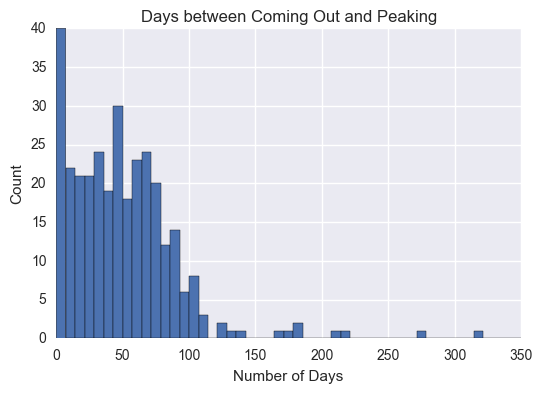

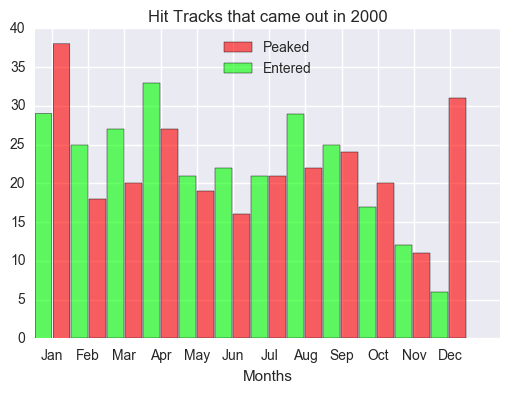

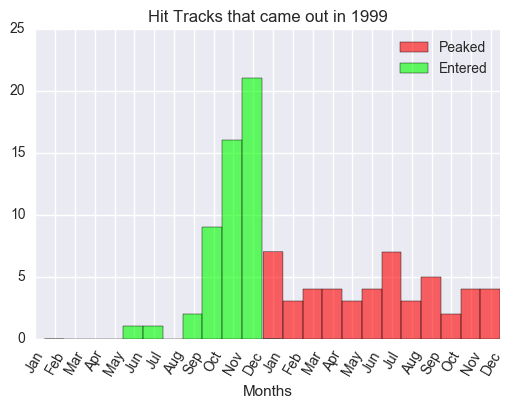

In [152]:
#plt.bar(df['date_peaked'].unique(),df['date_peaked'].value_counts())
#plt.show()
plt.hist(df['days_until_peak'],np.linspace(0,350,50))
plt.title("Days between Coming Out and Peaking")
plt.xlabel("Number of Days")
plt.ylabel("Count")
plt.show()

month_peak2000=np.array([datetime.strftime(x,"%-m") for x,y in zip(df['date_peaked'],\
                [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000])]).astype(int)
start2000=np.array([datetime.strftime(x,'%-m') for x in \
               [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000]\
               ]).astype(int)

plt.hist(month_peak2000,np.linspace(0,13,13),color=(1,0,0,.6),label="Peaked",width=0.5,align='right')
plt.hist(start2000,np.linspace(0,13,13),color=(0,1,0,.6),label="Entered",width=0.5)
plt.xticks(np.linspace(.5,12.5,12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Months")
plt.title("Hit Tracks that came out in 2000")
plt.legend(loc=9)
plt.show()


month_peak1999=np.array([datetime.strftime(x,"%-m") for x,y in zip(df['date_peaked'],\
                [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 1999])]).astype(int)
start1999=np.array([datetime.strftime(x,'%-m') for x in \
               [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 1999]\
               ]).astype(int)

plt.hist(month_peak1999+12,np.linspace(12,25,13),color=(1,0,0,.6),label="Peaked")
plt.hist(start1999-1,np.linspace(0,13,13),color=(0,1,0,.6),label="Entered")
plt.xticks(np.linspace(-0.5,24.5,24),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",\
                                     "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],\
           rotation=60)
plt.xlabel("Months")
plt.title("Hit Tracks that came out in 1999")
plt.legend(loc='upper right')
plt.show()

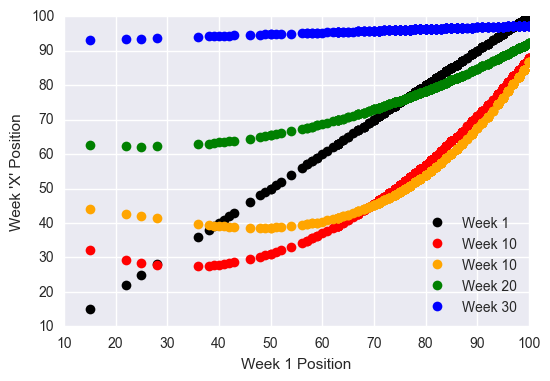

In [164]:
df.replace(np.nan,101,inplace=True)
fit1=np.polyfit(df['week_1'],df['week_1'].astype(np.int),3)
fit_fn1=np.poly1d(fit1)
fit5=np.polyfit(df['week_1'],df['week_5'].astype(np.int),2)
fit_fn5=np.poly1d(fit5)
fit10=np.polyfit(df['week_1'],df['week_10'].astype(np.int),3)
fit_fn10=np.poly1d(fit10)
fit20=np.polyfit(df['week_1'],df['week_20'].astype(np.int),2)
fit_fn20=np.poly1d(fit20)
fit30=np.polyfit(df['week_1'],df['week_30'].astype(np.int),1)
fit_fn30=np.poly1d(fit30)
plt.plot(df['week_1'],fit_fn1(df['week_1']),'o',color='black',label='Week 1')
plt.plot(df['week_1'],fit_fn5(df['week_1'].astype(np.int)),'o',color='red',label='Week 10')
plt.plot(df['week_1'],fit_fn10(df['week_1'].astype(np.int)),'o',color='orange',label='Week 10')
plt.plot(df['week_1'],fit_fn20(df['week_1'].astype(np.int)),'o',color='green',label='Week 20')
plt.plot(df['week_1'],fit_fn30(df['week_1'].astype(np.int)),'o',color='blue',label='Week 30')
plt.xlabel('Week 1 Position')
plt.ylabel('Week \'X\' Position')
plt.legend(loc="lower right")
plt.show()
df.replace(101,np.nan,inplace=True)

In [5]:
df.head()

,year,artist,track_name,track_time,genre,date_entered,date_peaked,week_1,week_2,week_3,...,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76,days_between
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63,49,...,101,101,101,101,101,101,101,101,101,56
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8,6,...,101,101,101,101,101,101,101,101,101,56
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48,43,...,101,101,101,101,101,101,101,101,101,98
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23,18,...,101,101,101,101,101,101,101,101,101,35
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47,45,...,101,101,101,101,101,101,101,101,101,70


In [ ]:
date_peaked=np.array([[x,temp["M"].value_counts()[x]] for x in temp["M"].unique()])
dat_p=date_peaked.T[0]
day_p=(date_peaked.T[1]).astype(int)
peaked=date_peaked.T

In [36]:
pd.set_option('display.max_rows', 80)

In [59]:
[x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000]

[Timestamp('2000-09-23 00:00:00'),
 Timestamp('2000-02-12 00:00:00'),
 Timestamp('2000-08-12 00:00:00'),
 Timestamp('2000-08-05 00:00:00'),
 Timestamp('2000-06-17 00:00:00'),
 Timestamp('2000-04-01 00:00:00'),
 Timestamp('2000-06-24 00:00:00'),
 Timestamp('2000-05-06 00:00:00'),
 Timestamp('2000-01-22 00:00:00'),
 Timestamp('2000-05-13 00:00:00'),
 Timestamp('2000-03-18 00:00:00'),
 Timestamp('2000-04-29 00:00:00'),
 Timestamp('2000-08-19 00:00:00'),
 Timestamp('2000-09-30 00:00:00'),
 Timestamp('2000-03-18 00:00:00'),
 Timestamp('2000-02-26 00:00:00'),
 Timestamp('2000-08-19 00:00:00'),
 Timestamp('2000-05-13 00:00:00'),
 Timestamp('2000-04-08 00:00:00'),
 Timestamp('2000-01-29 00:00:00'),
 Timestamp('2000-04-15 00:00:00'),
 Timestamp('2000-01-01 00:00:00'),
 Timestamp('2000-01-29 00:00:00'),
 Timestamp('2000-05-06 00:00:00'),
 Timestamp('2000-08-12 00:00:00'),
 Timestamp('2000-09-09 00:00:00'),
 Timestamp('2000-02-19 00:00:00'),
 Timestamp('2000-09-30 00:00:00'),
 Timestamp('2000-07-